In [1]:
# importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading the Dataset
df = pd.read_csv('/content/framingham (1).csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape


(4240, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


**Data Cleansing and EDA**

In [7]:
## Examining Null values in each feature
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [9]:
df.isnull().mean()*100

,0
male,0.000000
age,0.000000
education,2.476415
currentSmoker,0.000000
cigsPerDay,0.683962
BPMeds,1.250000
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.179245


**Null Values in Following Features:**

education-2.47%

cigPerDay-0.68%

BPMeds-1.25%

totChol-1.17%

BMI-0.44%

heartRate-0.02%

glucose-9.15%

<Axes: >

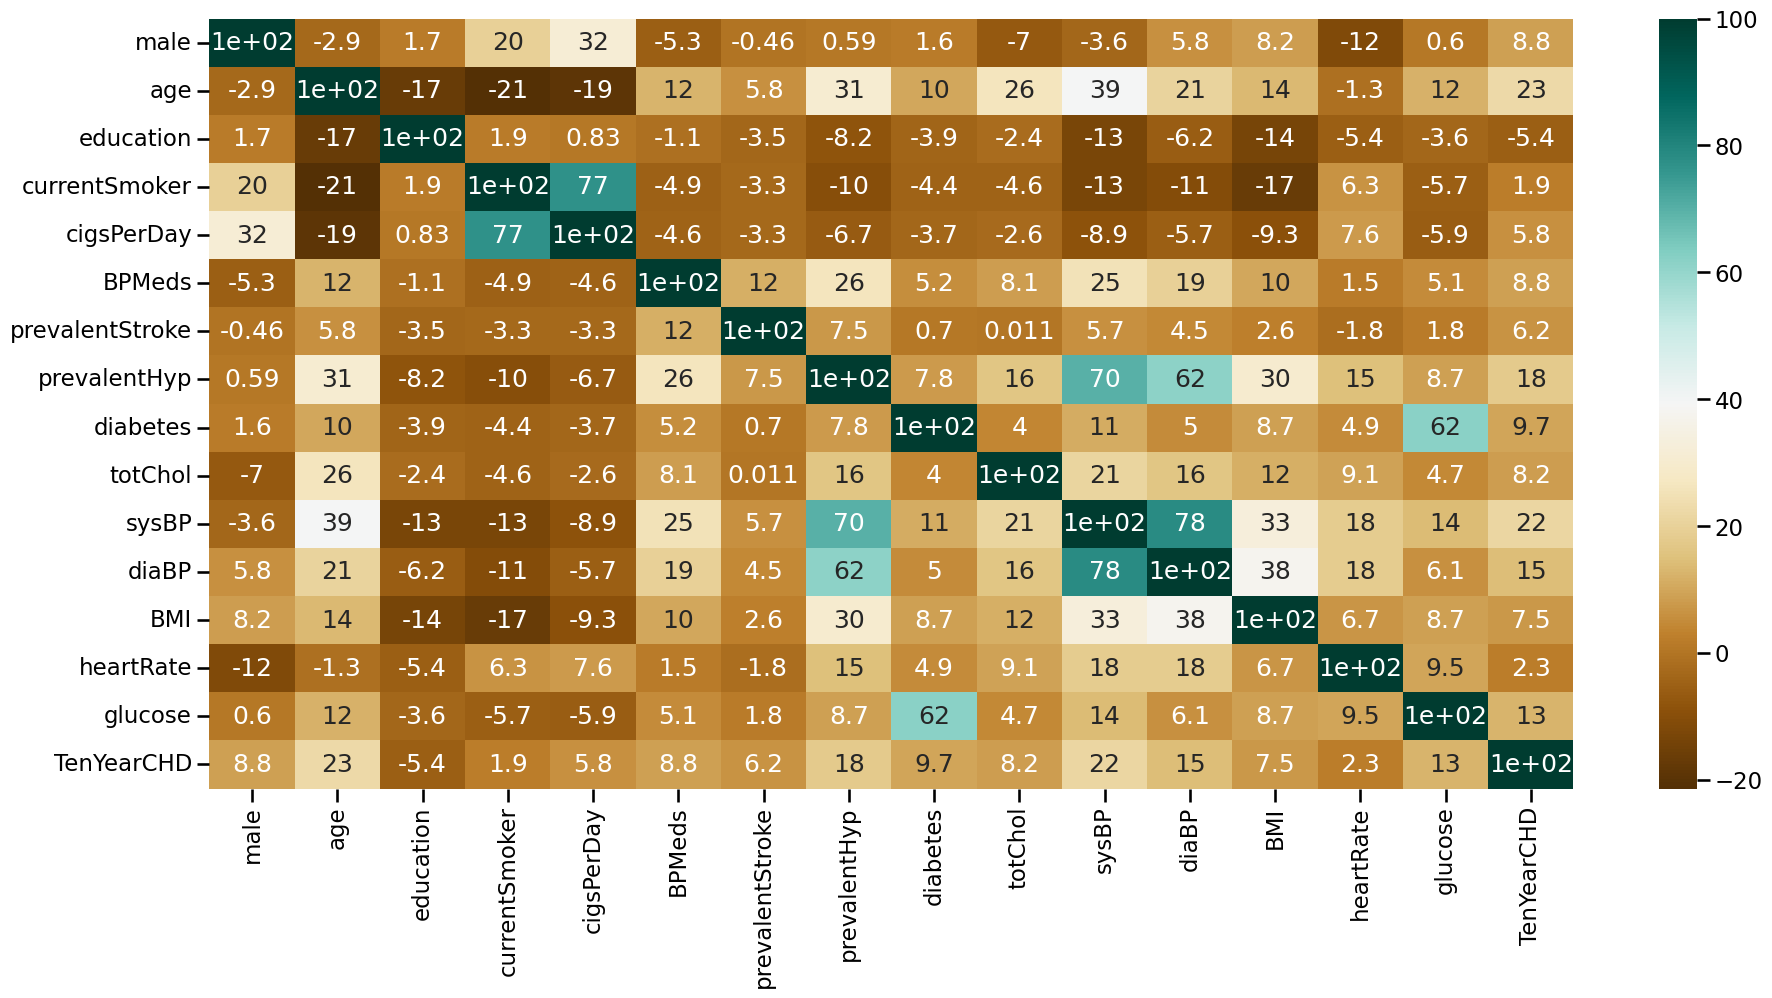

In [10]:
#Person Correlation
sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

**Observations:**
Correlation plot gives us valuable information regarding relation within attributes. It can Either be Negative or Positive or Nill. We need to keep 1 feature from 2 Strongly Correlated ones but since we want to perform EDA we'll keep all and drop them before modelling.


1. currentSmoker $ cigsPerDay has strong Correlation of 77
2. prevalentHyp vs sysBP / diaBP are having Positive Correlation of 70 and 62.
3. while, glucose & diabetes are postive Correlation.

Usually we fill Null Values with (Mean /Median /Mode) or we've techniques like forward/backward fill but in this case we can observe the Correlation plot and consider it to Fill missing values . E.g., We have Positive Correlation between currentSmoker & cisPerDay. we know that currentSmoker has values either 1 (is a smoker) or 0 (is not a Smoker),
we can groupby current Smoker and Impute Missing values based on M edian . We can do the same for BMI Based on male(Gender) & age.




In [11]:
# User defined function for missing value imputation

def impute_median(data):
  return data.fillna(data.median())



In [15]:
## median imputation
df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [16]:
# Rechecking if we have any missing valuuues left
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


**EDA**
1. We'll explore various features in this section and perform Univariate,Bivariate & Multivariate Analysis.
2. We'll observe descriptive statistics which will give us brief about spread of individual features.
3. Visualizing Target attribute will shows us if we've imbalanced dataset.

In [17]:
# Descriptive Stats
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Observations:**
Some of the features are Discrete so let us analyze continuous ones
1. **Age**: We can see that Min. age of subject found in given records is 32 while Max. being 70. So , values range from 32 to 70.
2. **cigsPerDay **: Subject smoking Cig.perday as low as nill while we have 70 Cigs per day making the Peak.
3. ** totChol **: min cholesterol level recorded is 107 whike Max. is 696.
4. **sysBP **: Min. Systolic Blood Pressure observed is 83 while Max. is 142.
5. ** diaBP** : Min. Diastolic Blood Pressure observed in Subject is 48 while max. os 142.
6. ** BMI**: Range from 15.56 to 56.
7. **heartRate**: observed heartrate is between 44 to 143.
8. **Glucose**: Glucose sugar level range is 40 to 394.

Text(0.5, 1.0, 'CHD by Gender')

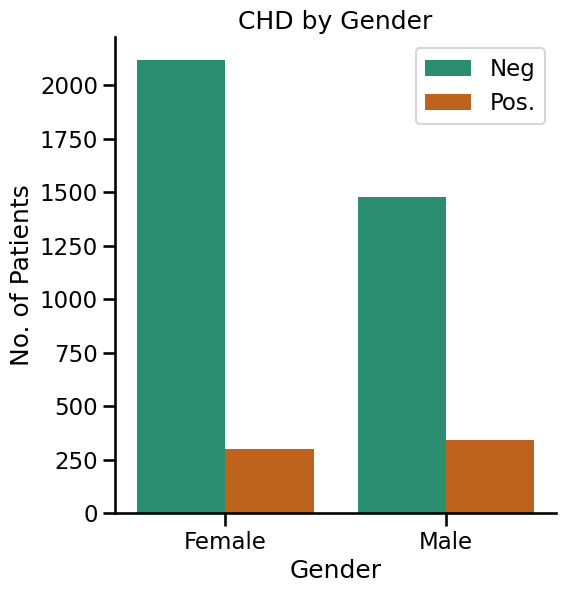

In [20]:
# CHD by Gende Viz
sns.catplot(x='male', hue='TenYearCHD', data = df, kind='count',palette='Dark2', height=6, legend= False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg', 'Pos.'])
plt.title('CHD by Gender')

**Observations :**

Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).

Observations tells us that we've Excessive number of people who are not suffering from CHD.

1. Negative : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.


2. Positive : While Approx. 10% of Females & Males are suffering from CHD.


By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

/tmp/ipython-input-1335405867.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'], color='orange')
/tmp/ipython-input-1335405867.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totChol'], color = 'g' )
/tmp/ipython-input-1335405867.py:15: UserWarning: 

`distplot` is a dep

Text(0.5, 1.0, 'Distribution of HeartRate')

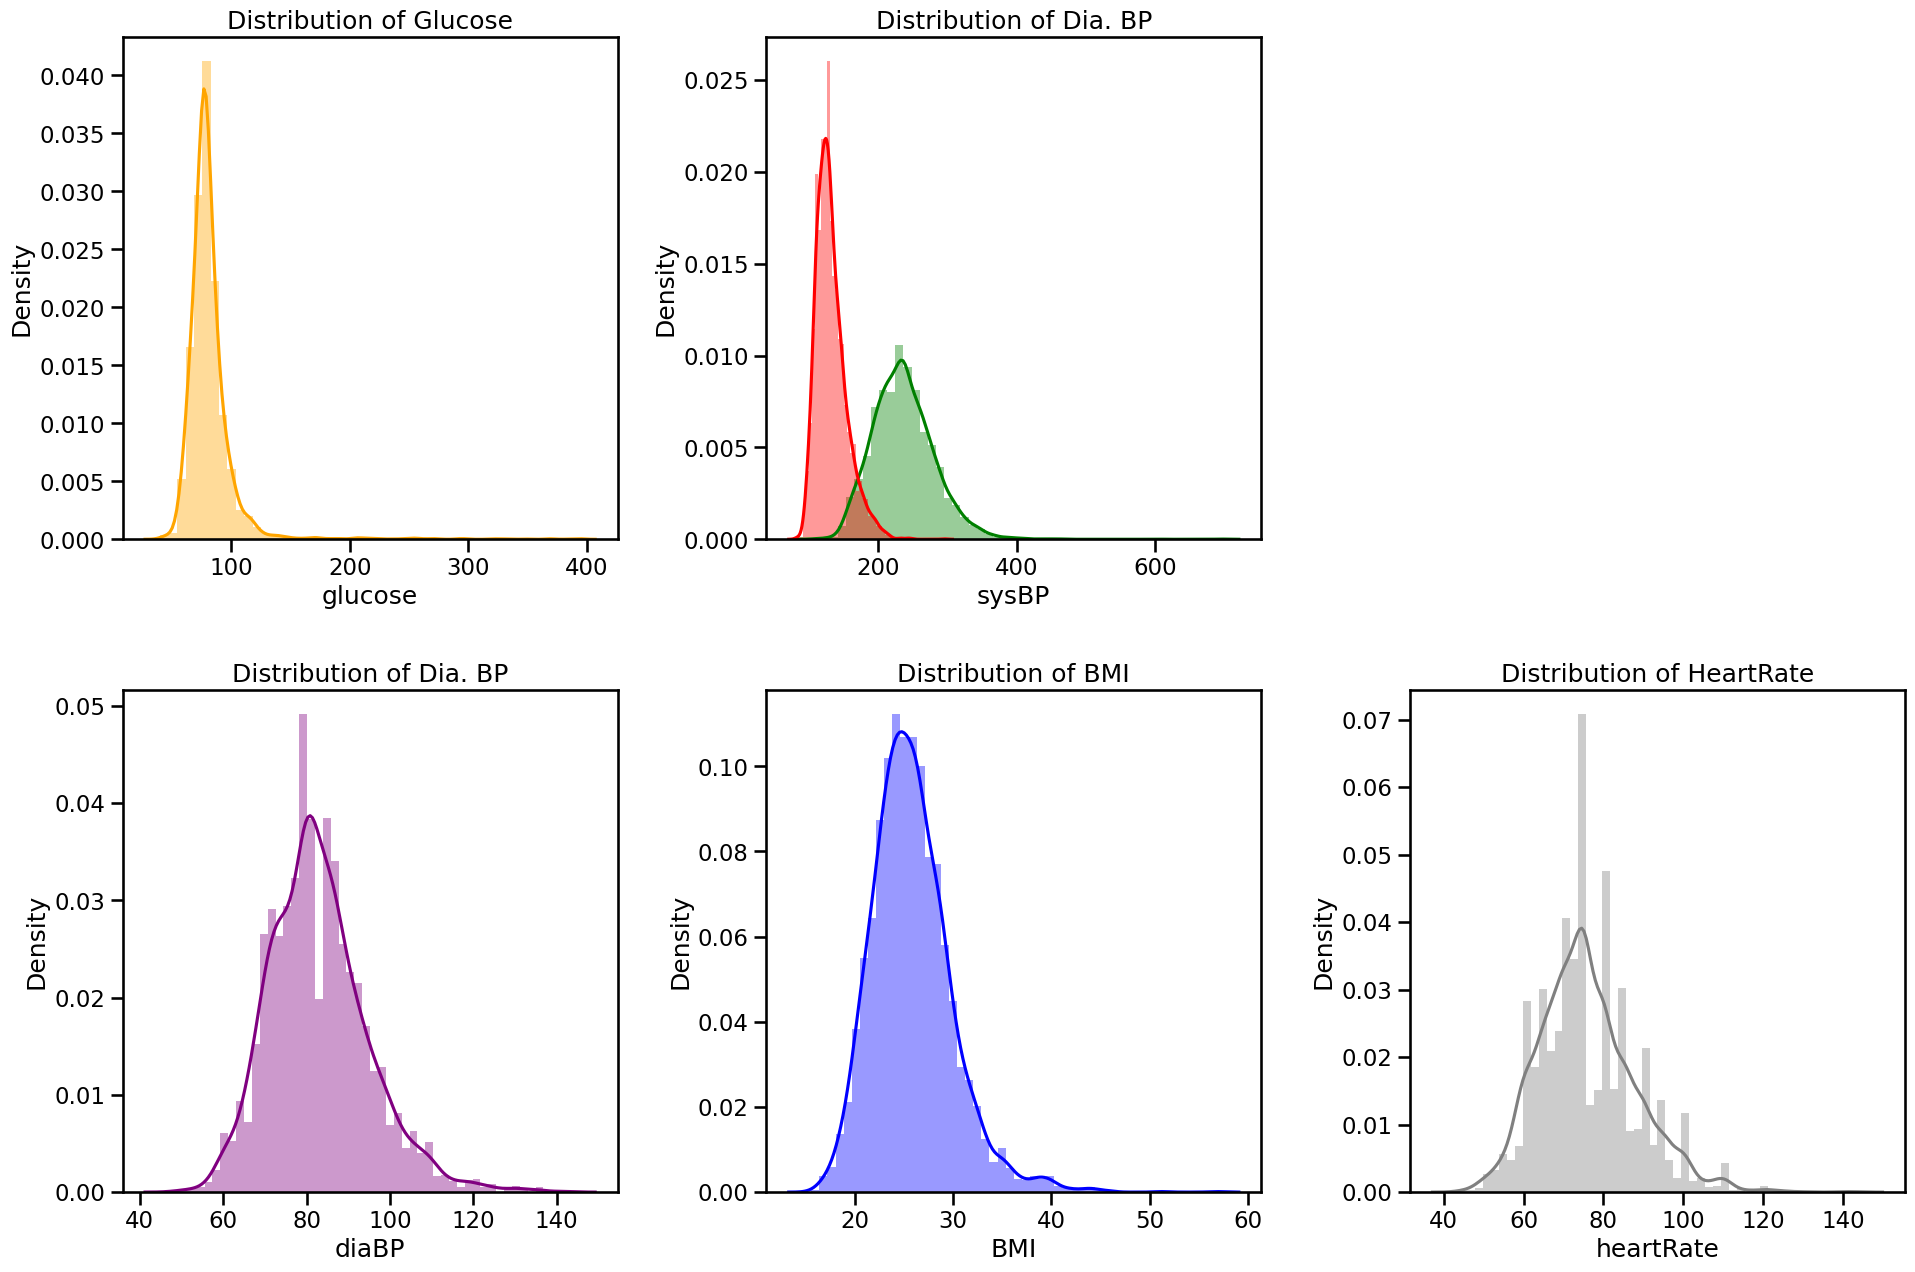

In [21]:
# Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,3,1)
sns.distplot(df['glucose'], color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color = 'g' )
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 2)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'], color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

Observations :

We can see** Glucose, Total Cholesterol, Systolic BP & BMI** is **Right Skewed.**

While **Diastolic BP & Heart Rate** are close to ** Normal / Gaussian Distribution.**

/tmp/ipython-input-3367939835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=15, kde=True, color='maroon')


Text(0.5, 1.0, 'Agewise distribution of the patients')

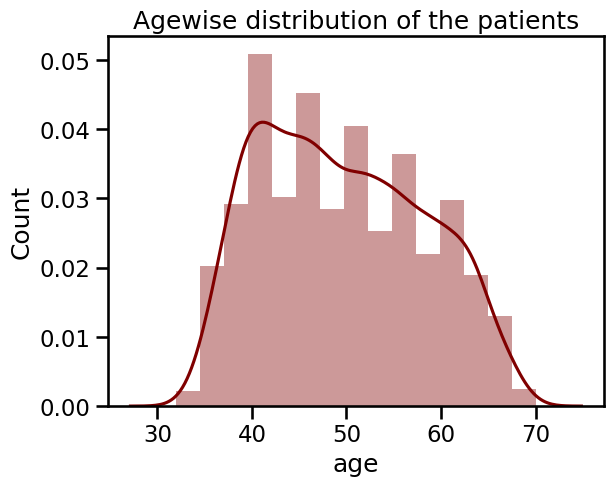

In [22]:

sns.distplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

In [23]:
#User-defined function

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

Above Functions will Encode Age and Heart Rate.

We can encode the Age Group Further :

Subject with Age <= 40 are Adults.
Subject with Age > 40 and <= 55 are Middle-Aged Adult.
Subject Above 55 will fall in Senior Category.
We'll Encode HeartRate as follows:

HeartRate <= 60 is Low / Resting HeartBeat.
HeartRate between 60 to 100 is considered as Normal.
While, HeartRate above 100 is High.

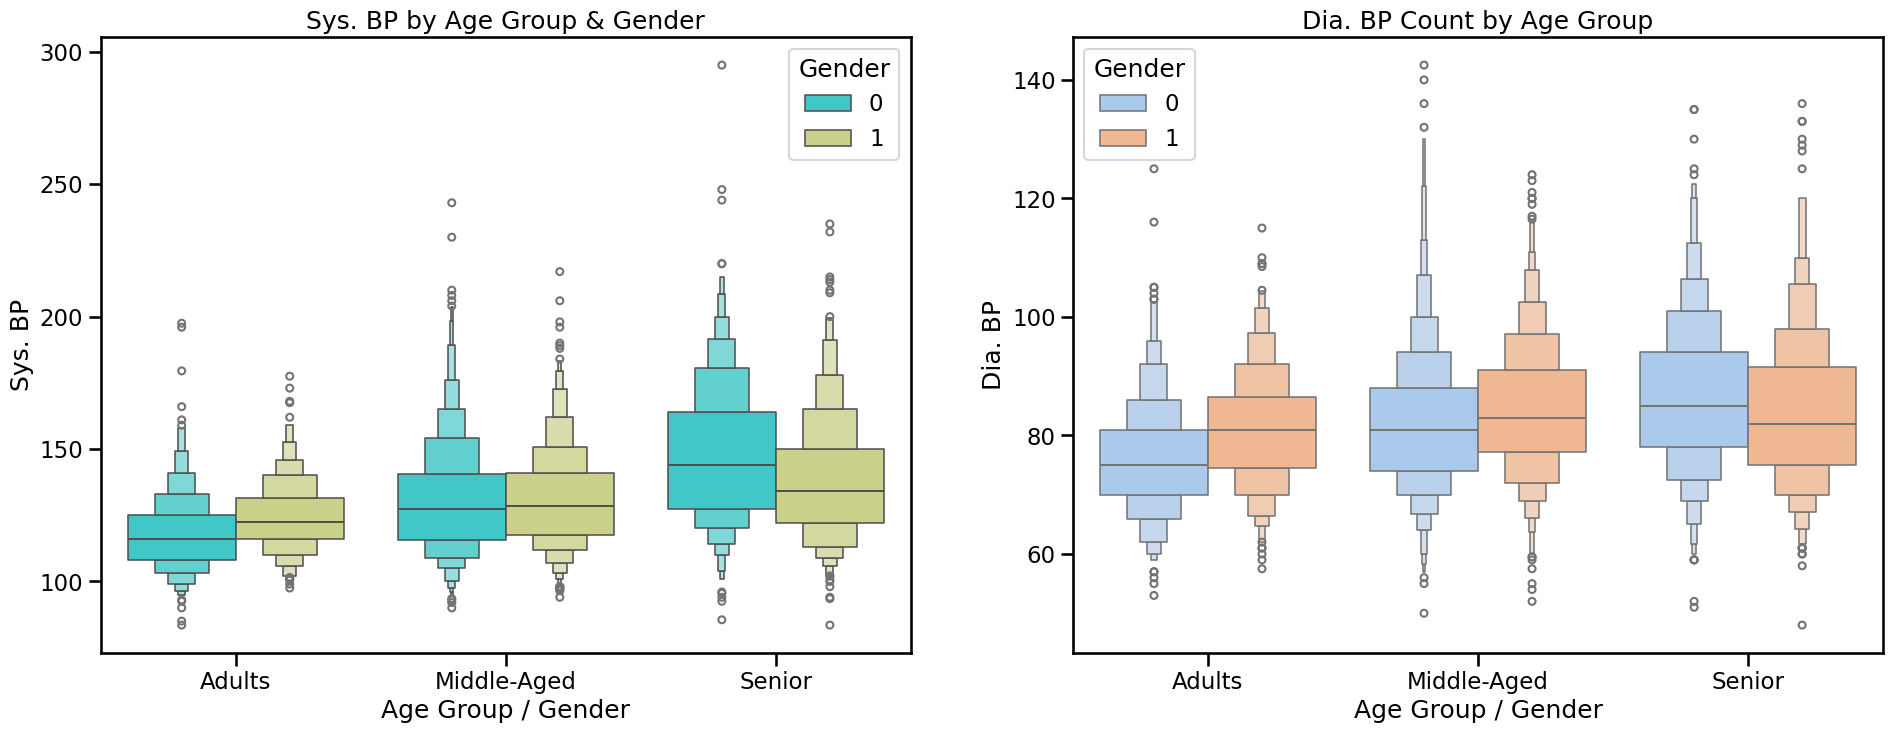

In [26]:
#Multivariate Analysis Pt. 2

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

Observations :

Sys. BP by Age Group & Gender : Sys. BP is Increasing by Age Group and Gender.

Dia. BP by Age Group & Gender : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

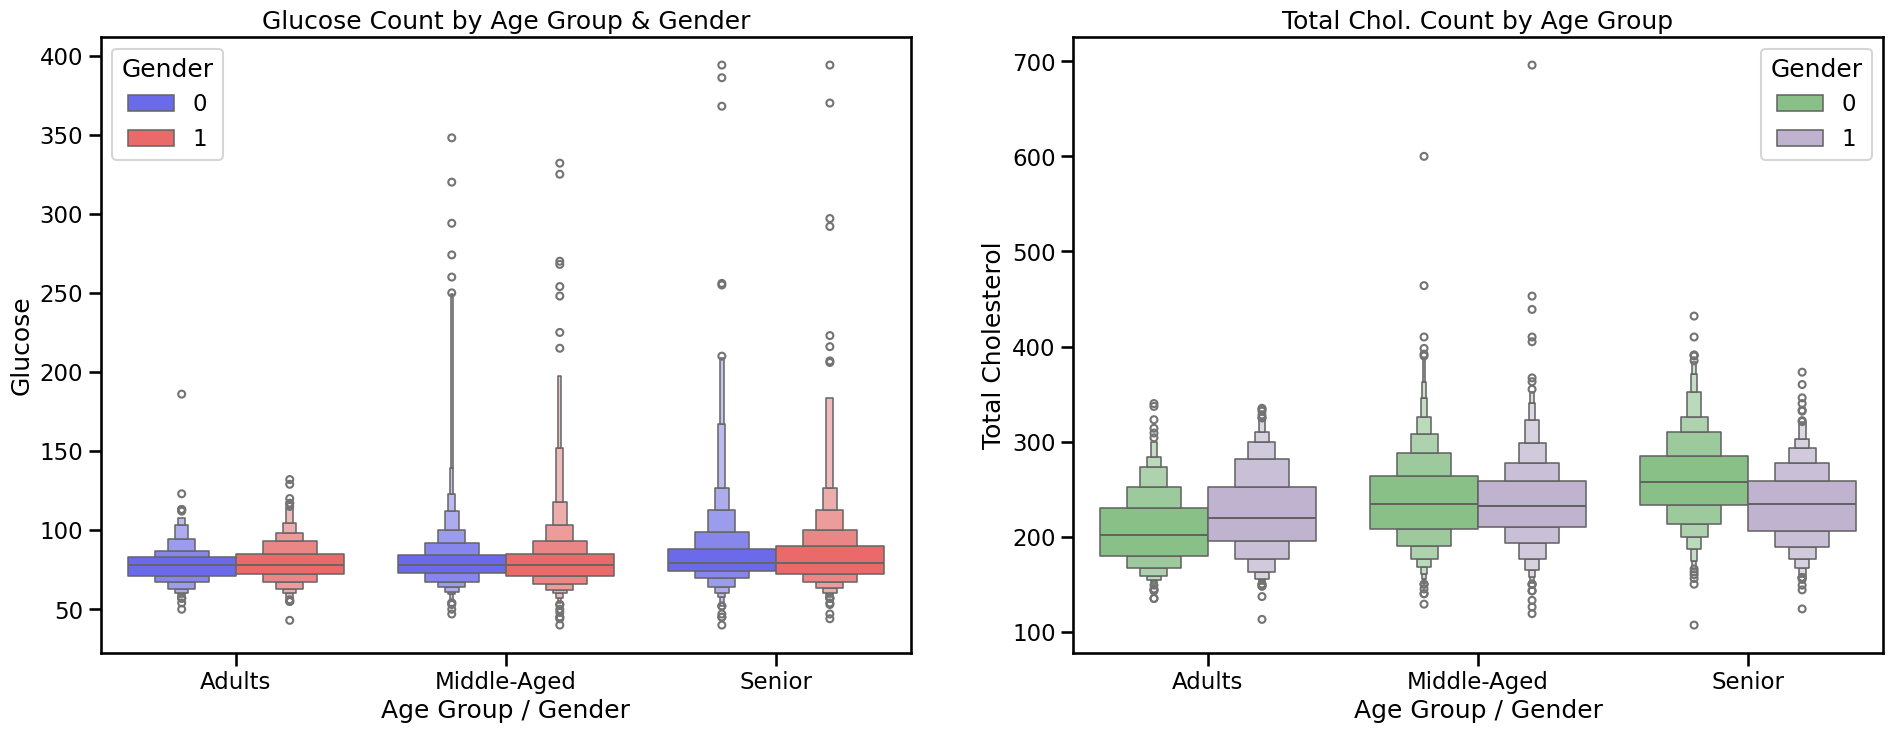

In [27]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

Observations :

Glucose Count by Age Group & Gender : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.

Total Cholesterol by Age Group & Gender : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

/tmp/ipython-input-1366088893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', height=7, palette='Greys_r')


Text(0.5, 1.0, 'Cigs. per day by Age Group')

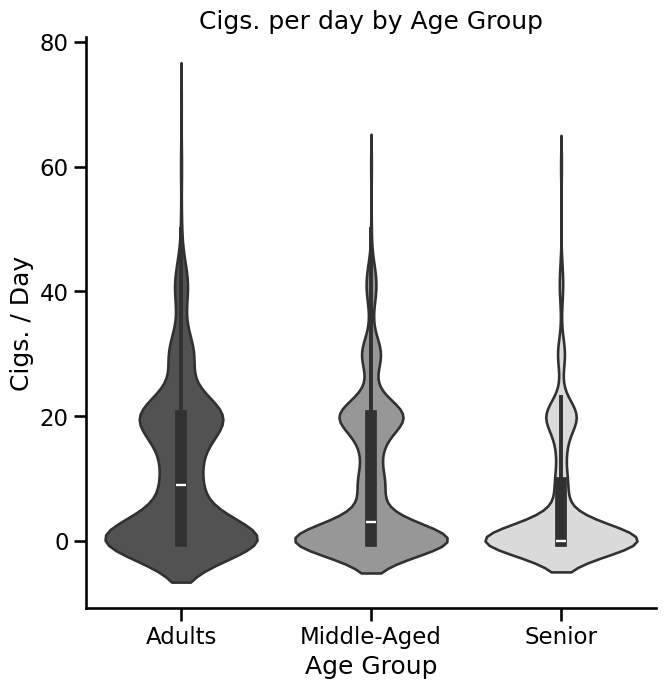

In [29]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', height=7, palette='Greys_r')
plt.xlabel('Age Group')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

**Observation :**

**Adults **: In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.

**Middle-Aged **: In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.

**Senior** : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

Text(0.5, 1.0, 'Diabetes by Age Group')

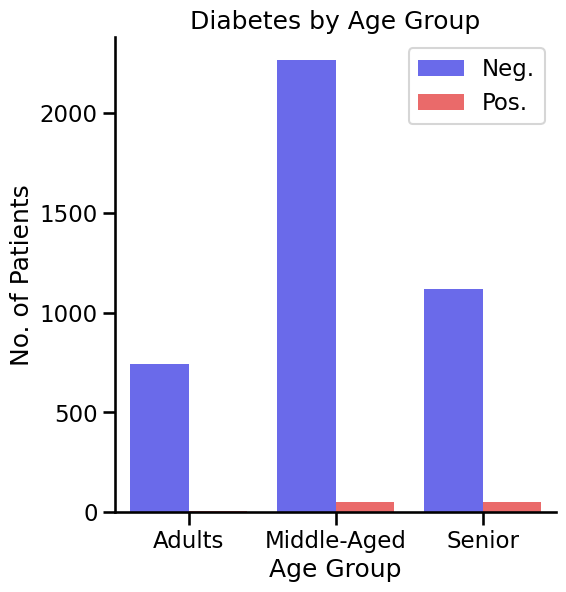

In [31]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='seismic', height=6, legend=False)
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

Observation :

Adults : Subject with Negative Diabetes Diagnosis are approx. 800 count while Positive Diabetes Diagnosis is Almost Nill.

Middle-Aged : Subject with Negative Diabetes Diagnosis are reaching the Peak of Approx. 2500 Count while Positive Count is Under 100.

Senior : Subject diagnosed Negative are Approx. 1000 while Positive Count is Under 100

Text(0.5, 1.0, 'Target Class Count')

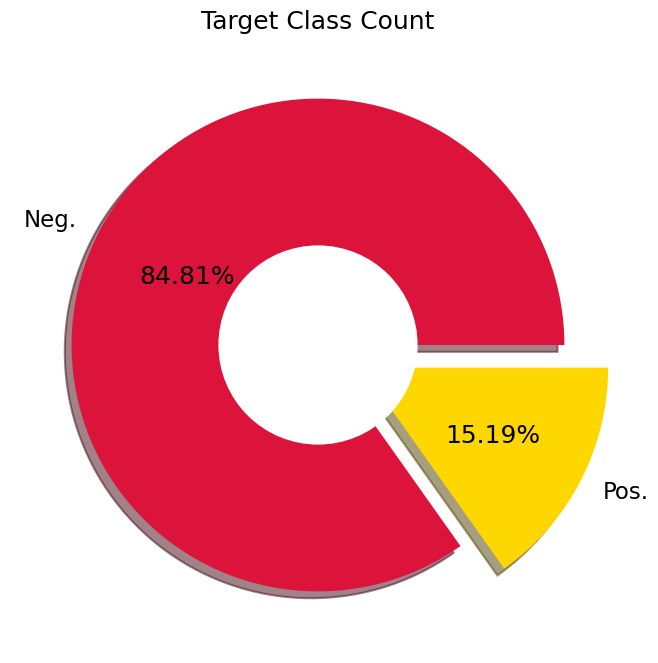

In [32]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','gold'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

**Observations :**

We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.

We'll need to Over-sample the Dataset in this case to get the best out of it.

But before we proceed with Over-Sampling we'll First try Basic Logistic Regression Model on Data we had processed.

In [33]:

#Making a copy of Dataset

df_copy = df.copy()

In [34]:
#Reading data

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [35]:
#Log Transform Continuous Variables

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
#df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'currentSmoker', 'education', 'enc_hr', 'encode_age'], axis=1, inplace=True)

Above we had performed Logarithmic Transformations to get rid of Ouliers which have in Continuous Variables.

Also, we're dropping those features on which we had performed Log Transformations.

We're also dropping "Education" as it is an unwanted feature here.

In [37]:

#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD'], axis=1).index)
norm_df.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,-0.958976,-1.130247,0.366175,0.417050,-0.179487,-1.296260
1,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,0.389489,-0.094351,0.781994,1.522102,-0.246230,-0.347297
2,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,1.143043,0.279789,-0.182594,-0.042965,0.002631,-0.665854,-0.102079
3,-0.867217,-0.173569,-0.077014,1.489778,-0.162437,1.408036,-0.182514,1.039278,0.747528,-0.914968,1.308555,1.282600
4,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,1.233898,1.101174,0.164064,-0.648574,0.806637,0.325550,-0.347297


Above we had Standard Scaled Data to Normalize the Dataset.

And we've created new Dataset as norm_df

We're dropping few features here because they are Positively Correlated (As we saw in Correlation Plot)

In [38]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3180, 12), (1060, 12), (3180,), (1060,))

In [40]:
#model training
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#training the logistic regression model withtraining data
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
LogisticRegression()

LogisticRegression()

In [43]:
#Model Evaluation
#Accuracy score
#accuray on training data
X_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

print('Accuracy on training data : ' ,training_data_accuracy)

Accuracy on training data :  0.85062893081761


In [46]:
# accuracy on test data
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

print('Accuracy on test data : ' , test_data_accuracy)

Accuracy on test data :  0.8603773584905661


In [48]:
#building a predictive system

import numpy as np
input_data = (43,1,1,30,0,0,1,0,225,162,107,23,61,93,88)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)



# 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
input_data = (1, 43, 1, 1, 30, 0, 0, 1, 0, 225, 162, 107, 23, 61, 93) #  input data with 15 features in assumed order

# Convert input data to a pandas DataFrame with original column names (excluding TenYearCHD)
original_cols = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
input_df = pd.DataFrame([input_data], columns=original_cols)

# Apply log transformations to the relevant columns
input_df['log_cigsPerDay'] = np.log1p(input_df['cigsPerDay'])
input_df['log_totChol'] = np.log1p(input_df['totChol'])
# input_df['log_sysBP'] = np.log1p(input_df['sysBP']) # sysBP was dropped in the original transformation
input_df['log_diaBP'] = np.log1p(input_df['diaBP'])
input_df['log_BMI'] = np.log1p(input_df['BMI'])
input_df['log_heartRate'] = np.log1p(input_df['heartRate'])
input_df['log_glucose'] = np.log1p(input_df['glucose'])
input_df['log_age'] = np.log1p(input_df['age'])


# Drop the original continuous features and the other dropped columns
cols_to_drop_for_prediction = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
                               'currentSmoker', 'education'] # Removed 'enc_hr', 'encode_age' as they were derived and not part of original 15 input features
input_df_processed = input_df.drop(cols_to_drop_for_prediction, axis=1)


# Ensure the columns are in the same order as the training data (norm_df)
input_df_processed = input_df_processed[x_train.columns]


# Apply the same scaler used for training data
input_data_scaled = scaler.transform(input_df_processed)


prediction = model.predict(input_data_scaled)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Diseases')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
#SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)

svm_pred = svm_clf.predict(x_test)
print(accuracy_score(y_test , svm_pred))

0.8575471698113207


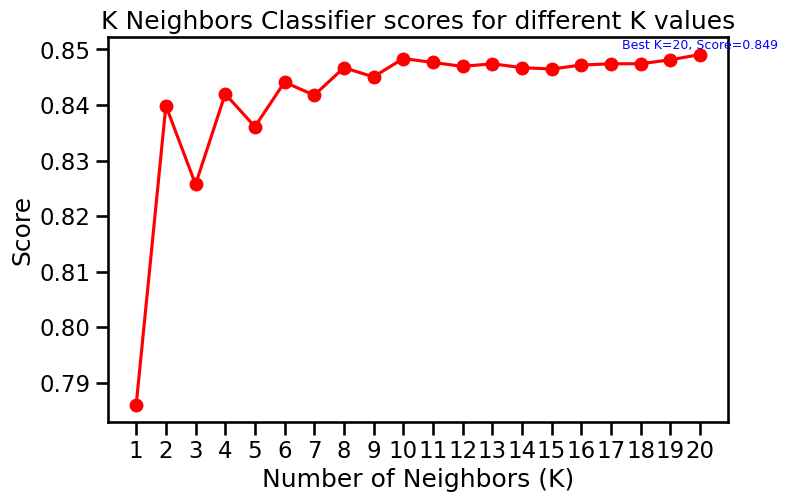

In [53]:
best_k = range(1, 21)[knn_score.index(max(knn_score))]
best_score = max(knn_score)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), knn_score, color='red', marker='o')
plt.text(best_k, best_score + 0.001, f"Best K={best_k}, Score={best_score:.3f}",
         ha='center', fontsize=9, color='blue')

plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [55]:
# Calculate accuracy scores for each model
from sklearn.metrics import accuracy_score

# Assuming svm_clf is your trained SVM model and knn_score contains KNN cross-validation scores
logistic_regression_accuracy = accuracy_score(y_test, model.predict(x_test)) # Using the 'model' variable for Logistic Regression
svm_accuracy = accuracy_score(y_test, svm_clf.predict(x_test))

# Find the index of the best KNN score and get the corresponding K value
best_k_index = knn_score.index(max(knn_score))
best_k_value = range(1, 21)[best_k_index]

# Train a KNN model with the best K value to get the test accuracy
from sklearn.neighbors import KNeighborsClassifier
best_knn_model = KNeighborsClassifier(n_neighbors=best_k_value)
best_knn_model.fit(x_train, y_train)
knn_accuracy = accuracy_score(y_test, best_knn_model.predict(x_test))


# Store accuracy results in a dictionary
accuracy_results = {
    "Logistic Regression": logistic_regression_accuracy,
    "SVM": svm_accuracy,
    "KNN (k={})".format(best_k_value): knn_accuracy
}

# Identify the best model
best_model = max(accuracy_results, key=accuracy_results.get)
print("Accuracy Results:")
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy:.2%}")

print(f"\nBest Model: {best_model} with Accuracy: {accuracy_results[best_model]:.2%}")

Accuracy Results:
Logistic Regression: 86.04%
SVM: 85.75%
KNN (k=20): 85.38%

Best Model: Logistic Regression with Accuracy: 86.04%
